In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/piccccc/thumbs-up.png
/kaggle/input/piccccc/skull-icon.png
/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


In [3]:
fake = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/Fake.csv')
true = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/True.csv')

In [4]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
true["subject"].value_counts()

subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64

In [7]:
fake["subject"].value_counts()

subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64

In [8]:
fake["category"] = 1
true["category"] = 0

In [9]:
fake.head()

,title,text,subject,date,category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [10]:
df = pd.concat([true, fake]).reset_index(drop = True)

In [11]:
df.head(10)

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",0
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",0
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",0
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",0
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",0


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

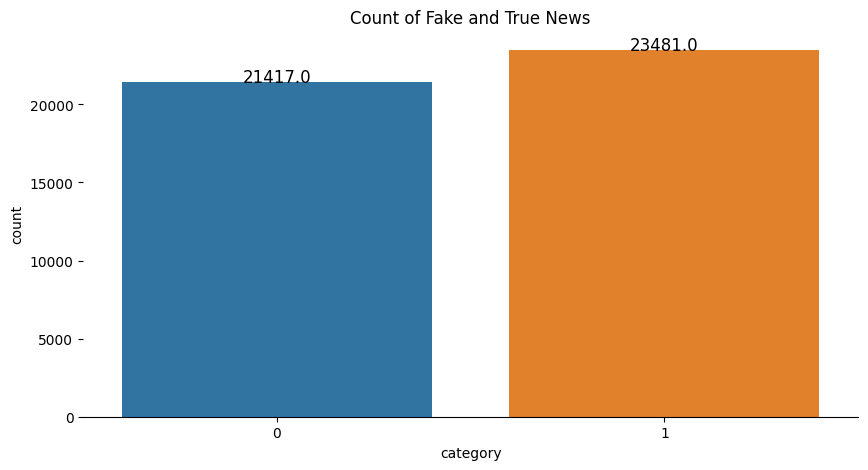

In [13]:
#creating a count plot for category column
fig = plt.figure(figsize=(10,5))



graph = sns.countplot(x="category", data=df)
plt.title("Count of Fake and True News")

#removing boundary
graph.spines["right"].set_visible(False)
graph.spines["top"].set_visible(False)
graph.spines["left"].set_visible(False)

#annoting bars with the counts  
for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.2,height ,ha="center",fontsize=12)

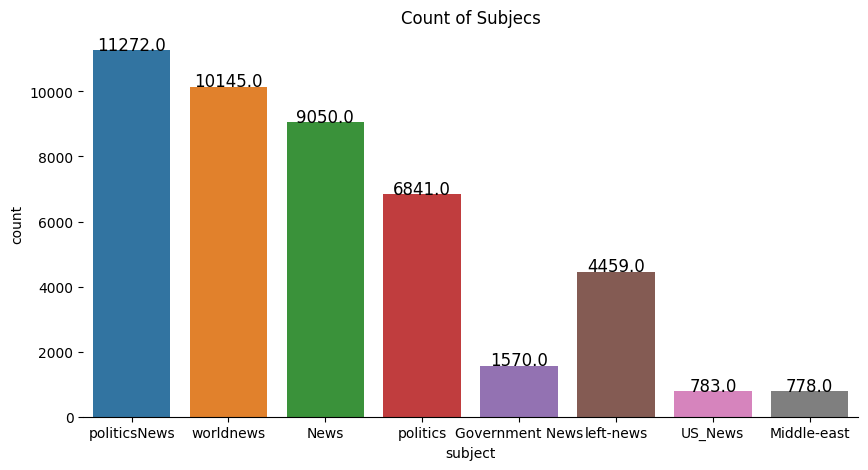

In [14]:
#creating a count plot for subject column
fig = plt.figure(figsize=(10,5))



graph = sns.countplot(x="subject", data=df)
plt.title("Count of Subjecs")

#removing boundary
graph.spines["right"].set_visible(False)
graph.spines["top"].set_visible(False)
graph.spines["left"].set_visible(False)

#annoting bars with the counts  
for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.2,height ,ha="center",fontsize=12)

In [15]:
#checking if any missing values exists
df.isna().sum()*100/len(df)

title       0.0
text        0.0
subject     0.0
date        0.0
category    0.0
dtype: float64

In [16]:
#data cleaning, we dont need date columns for current model
blanks=[]

#index,label and review of the doc
for index,text in df["text"].items(): # it will iter through index,label and review
    if text.isspace(): # if there is a space
        blanks.append(index) #it will be noted down in empty list

len(blanks)

631

In [17]:

df["text"][8970]

' '

In [18]:
df.shape

(44898, 5)

In [19]:
df.drop(blanks, inplace = True)

In [20]:
df.shape

(44267, 5)

In [21]:
df["text"] = df["title"]  + df["text"]
df = df[["text", "category"]]

In [22]:
df.head()

,text,category
0,"As U.S. budget fight looms, Republicans flip t...",0
1,U.S. military to accept transgender recruits o...,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,0
3,FBI Russia probe helped by Australian diplomat...,0
4,Trump wants Postal Service to charge 'much mor...,0


In [23]:
#importing libraries for cleaning puprose

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import spacy
import re

In [24]:
#loading spacy library
nlp=spacy.load("en_core_web_sm")

#creating instance
lemma=WordNetLemmatizer()

In [25]:
#stopwords of spacy
list1=nlp.Defaults.stop_words
print(list1)

{'call', 'both', 'anyway', 'be', 'hers', 'also', 'no', 'then', 'should', 'nevertheless', 'seemed', 'name', 'per', "n't", 'how', 'meanwhile', 'beyond', 'formerly', 'side', 'its', 'thereafter', 'whence', 'because', "'re", 'already', 'yourselves', 'might', 'ten', 'he', 'seeming', 'however', 'latter', 'where', 'against', 'that', 'otherwise', 'seems', 'something', 'has', 'well', 'her', 'none', 'ca', 'an', 'becomes', 'behind', 'never', 'rather', 'this', 'seem', 'anyhow', 'a', 'least', 'him', 'and', 'bottom', '’ve', 'his', 'off', 'just', 'into', 'fifty', 'fifteen', 'become', 'hence', 'first', 'of', 'nothing', 'could', 'their', 'whereafter', 'himself', 'we', 'beside', 'i', 'at', 'became', 'with', 'everywhere', 'always', 'your', 'up', 'can', 'almost', 'nine', 'every', 'amongst', 'either', 'during', 'whole', 'top', '’d', 'why', 'five', 'make', 'nor', 'even', "'ll", 'sixty', 'hereby', 'put', 'more', 'whenever', 'among', 'hundred', 'another', 'whose', 'everyone', 'which', 'themselves', 'from', 'wh

In [26]:
#stopwords of NLTK
list2=stopwords.words('english')
print(list2)


['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [27]:
#combining the stopword list
Stopwords=set((set(list1)|set(list2)))

In [28]:
print(Stopwords)

{'within', 'elsewhere', 'enough', 'call', 'isn', '’re', 'if', 'both', 'really', 'anyway', 'be', 'hers', 'also', 'my', 'no', 'does', 'latterly', "you'll", 'then', 'should', 'nevertheless', 'theirs', 'whereby', 'seemed', 'name', 'per', "n't", 'last', 'how', "they're", 'meanwhile', 'our', 'beyond', 'formerly', 'side', 'regarding', 'here', 'having', 'its', 'thereafter', 'for', 'keep', 'whence', 'because', 'thru', 'same', "'re", 'won', 'already', 'full', 'yourselves', 'might', 'ten', "we'd", '‘s', 'he', 'seeming', 'n’t', 'empty', 'however', "shouldn't", "that'll", 'latter', 'where', 'against', 'that', 'anywhere', 'otherwise', "we'll", 'seems', 'something', 'has', 'across', 'well', "he'd", 'her', 'none', 'ca', 'becoming', 'neither', "'ve", "isn't", "i'm", 'an', 'cannot', 'twenty', 'becomes', 'behind', 'please', 'never', 'wherever', 'rather', 'will', "doesn't", 'this', 'seem', 'anyhow', 'a', 'least', 'forty', 'him', "you'd", 'amount', 'and', 'bottom', 'thereby', '’ve', 'those', 'his', 'off', 

In [29]:
#text cleaning function
def clean_text(text):
    
    """
    It takes text as an input and clean it by applying several methods
    
    """
    
    string = ""
    
    #lower casing
    text=text.lower()
    
    #simplifying text
    text=re.sub(r"i'm","i am",text)
    text=re.sub(r"he's","he is",text)
    text=re.sub(r"she's","she is",text)
    text=re.sub(r"that's","that is",text)
    text=re.sub(r"what's","what is",text)
    text=re.sub(r"where's","where is",text)
    text=re.sub(r"\'ll"," will",text)
    text=re.sub(r"\'ve"," have",text)
    text=re.sub(r"\'re"," are",text)
    text=re.sub(r"\'d"," would",text)
    text=re.sub(r"won't","will not",text)
    text=re.sub(r"can't","cannot",text)
    
    #removing any special character
    text=re.sub(r"[-()\"#!@$%^&*{}?.,:]"," ",text)
    text=re.sub(r"\s+"," ",text)
    text=re.sub('[^A-Za-z0-9]+',' ', text)
    
    for word in text.split():
        if word not in Stopwords:
            string+=lemma.lemmatize(word)+" "
    
    return string

In [30]:
#cleaning the whole data
df["text"]=df["text"].apply(clean_text)

In [31]:
df.head()

,text,category
0,u budget fight loom republican flip fiscal scr...,0
1,u military accept transgender recruit monday p...,0
2,senior u republican senator let mr mueller job...,0
3,fbi russia probe helped australian diplomat ti...,0
4,trump want postal service charge amazon shipme...,0


In [32]:

from wordcloud import WordCloud
df.head()

,text,category
0,u budget fight loom republican flip fiscal scr...,0
1,u military accept transgender recruit monday p...,0
2,senior u republican senator let mr mueller job...,0
3,fbi russia probe helped australian diplomat ti...,0
4,trump want postal service charge amazon shipme...,0


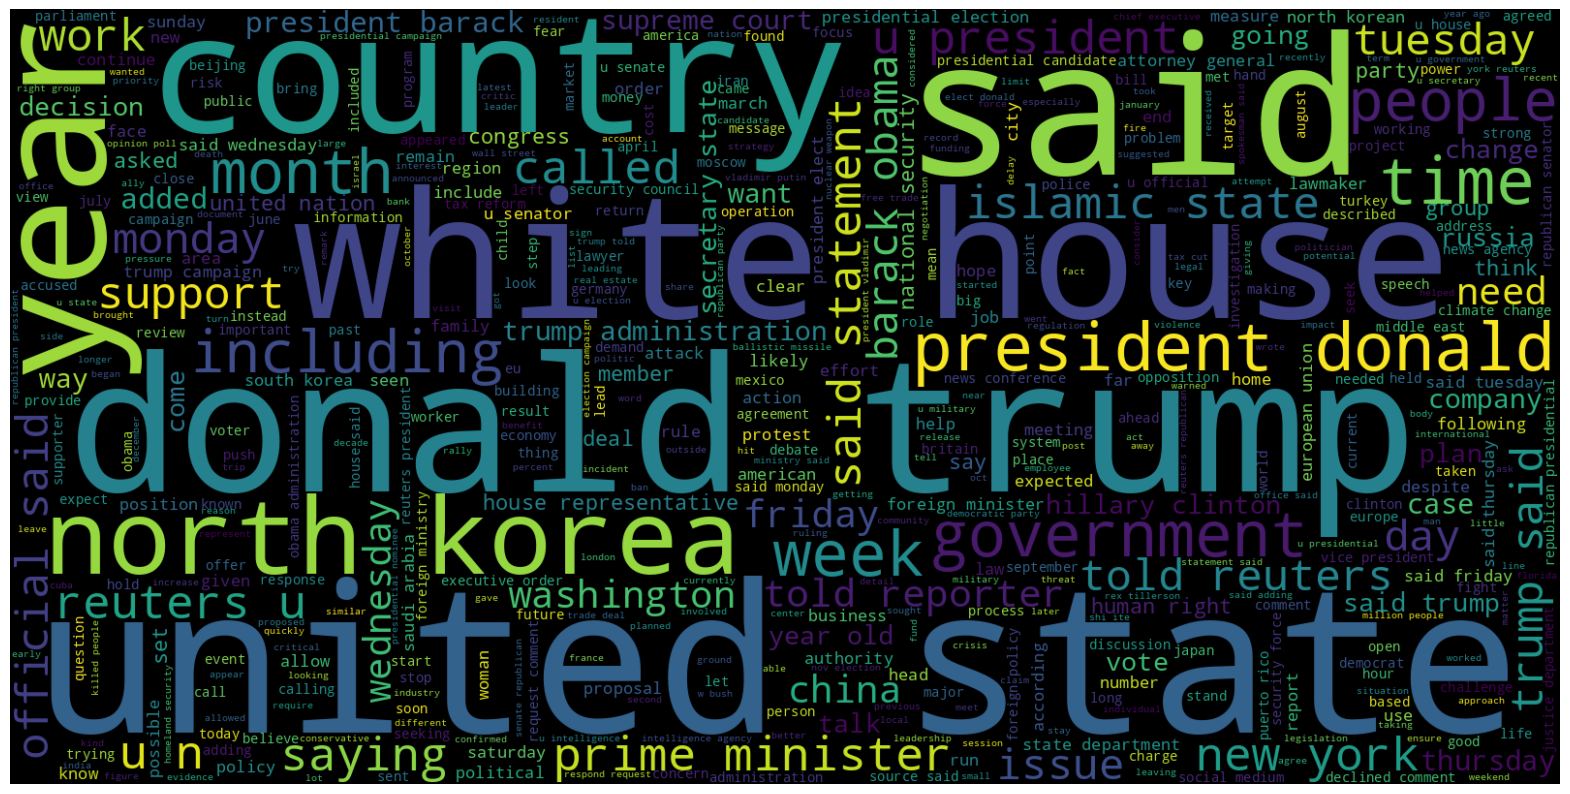

In [33]:
#True News
plt.figure(figsize = (20,20))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(df[df.category == 0].text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

In [34]:
#creating more intiuive wordcloud 

#pil is pillow and used for image manupulation
from PIL import Image

In [35]:
#creating a mask of thumb
thumb="/kaggle/input/piccccc/thumbs-up.png"
icon=Image.open(thumb)
mask=Image.new(mode="RGB",size=icon.size, color=(255,255,255))
mask.paste(icon, box=icon)

rgb_array=np.array(mask)

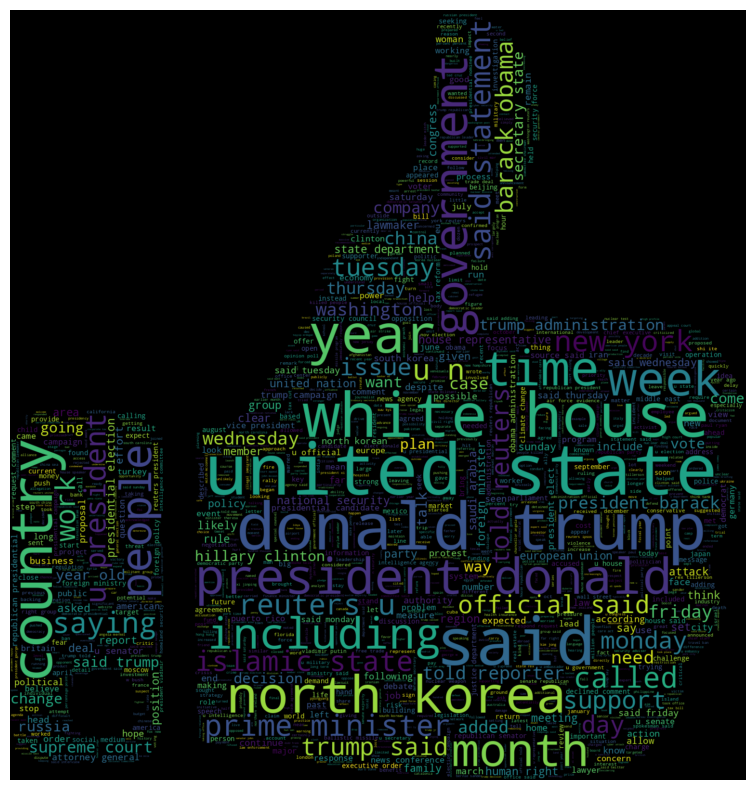

In [37]:
#True News
plt.figure(figsize = (10,10))
Wc = WordCloud(mask=rgb_array,max_words = 2000 , width = 1600 ,
               height = 800)

Wc.generate(" ".join(df[df.category == 0].text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

In [39]:
#creating word cloud using skull image for fake news which depict that 
#fake news are dangerous 

skull="/kaggle/input/piccccc/skull-icon.png"
icon=Image.open(skull)
mask=Image.new(mode="RGB",size=icon.size, color=(255,255,255))
mask.paste(icon, box=icon)

rgb_array=np.array(mask)

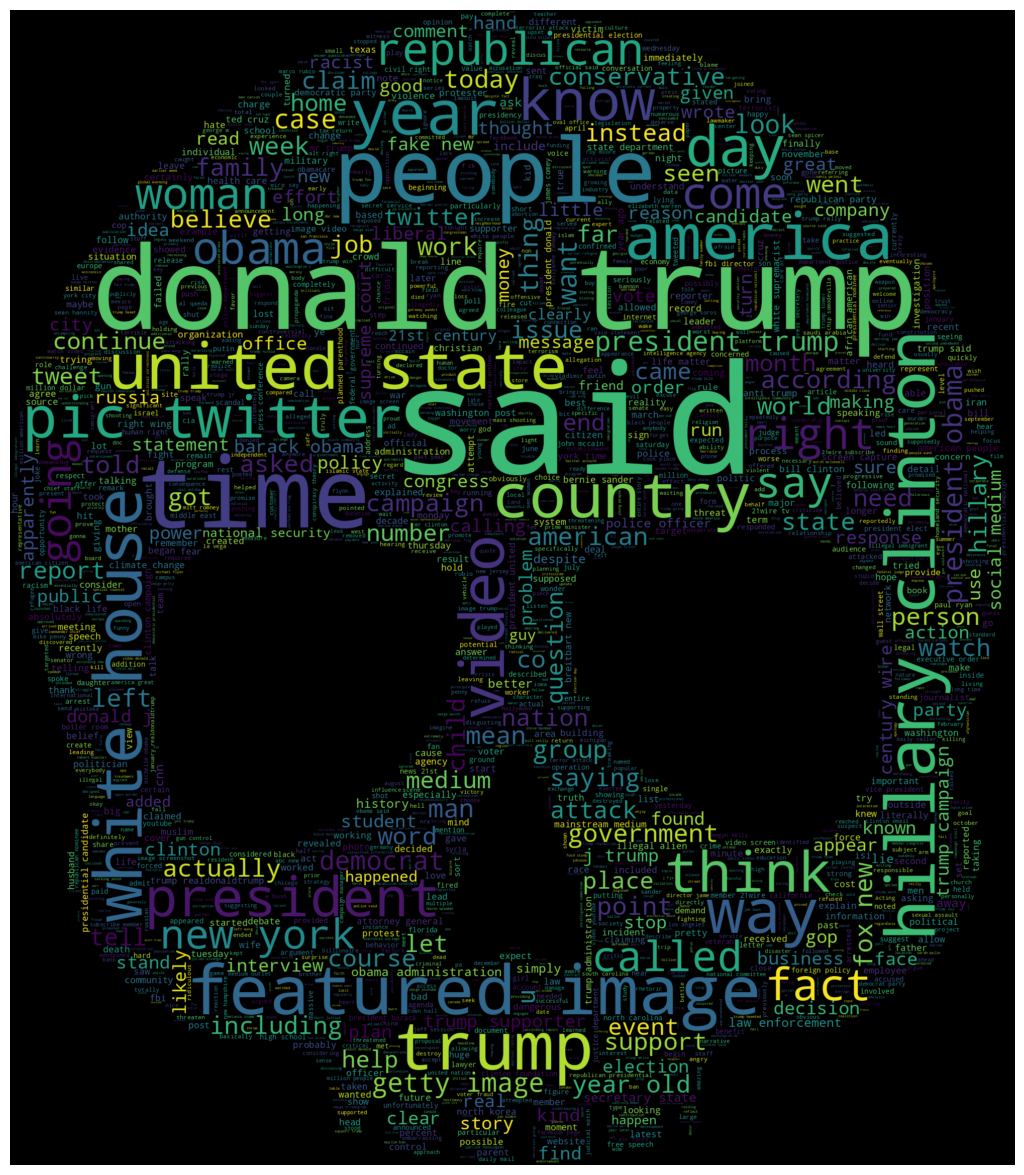

In [40]:
#Fake News
plt.figure(figsize = (15,15))
Wc = WordCloud(mask=rgb_array,max_words = 2000 , width = 1600 ,
               height = 800)

Wc.generate(" ".join(df[df.category == 1].text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

Feature Extarction and Modeling

In [41]:
from sklearn.model_selection import train_test_split

x = df["text"] #feature 
y = df["category"] #target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [42]:
#importing libraries to build a pipline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [43]:
#this pipe line will take the text and vectorise it , and then TF-IDF, then fitting the model

text_clf=Pipeline([("tfidf",TfidfVectorizer()),("clf",LinearSVC())])
text_clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [45]:
#making prediction using the model
predictions=text_clf.predict(X_test)

In [48]:
from sklearn import metrics
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7099
           1       1.00      0.99      0.99      7510

    accuracy                           0.99     14609
   macro avg       0.99      0.99      0.99     14609
weighted avg       0.99      0.99      0.99     14609



In [49]:
#overall acuracy
print(metrics.accuracy_score(y_test,predictions))

0.9934971592853721


In [50]:
#confusion matrix
print(metrics.confusion_matrix(y_test,predictions))

[[7069   30]
 [  65 7445]]
